In [22]:
%matplotlib inline
import likelihoodfree.io as io
import likelihoodfree.viz as viz
import matplotlib.pyplot as plt
import numpy as np
import os

dirs = {}
dirs['dir_data'] = '../results/mog/data/'
dirs['dir_nets'] = '../results/mog/nets/'
dirs['dir_plots'] = '../results/mog/plots/'

prefix = 'iwloss'
postfix = 'iter_3'

## Analyse the run

## ... show some info on iteration 1

In [23]:
info = io.load(dirs['dir_nets'] + '/' + prefix + '_' + postfix + '_info.pkl')
print(viz.info(info, title='{} {}'.format(prefix, postfix)))

iwloss iter_3
errors : 
obs : [[ 0.]]
prefix : iwloss
postfix : iter_3
runtime : 54.37321710586548
svi : False
git_revision_hash : b'57b6deb588299db162a8effbdee9bbc4ee0b213f\n'
act_fun : tanh
iw_loss : True
n_components : 2
n_hiddens : [20]
n_inputs : 1
n_outputs : 1
numerical_fix : False
prior_alpha : 0.1
rnn_hiddens : None
seed : None



## ... plot the training loss

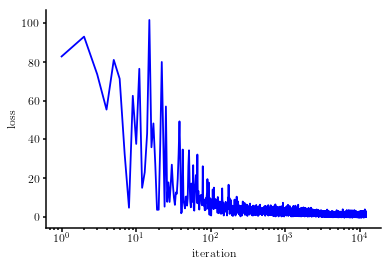

In [24]:
fig, ax = viz.loss(info)
plt.show()

## ... and the distance of samples to the observation

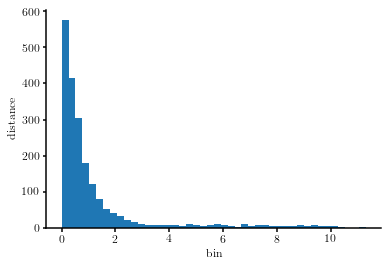

In [25]:
dist = io.load(dirs['dir_nets'] + '/' + prefix + '_' + postfix + '_dist.pkl')
fig, ax = viz.dist(dist)

## ... what about the true posterior?

In [26]:
sim = io.load(dirs['dir_nets'] + '/' + prefix + '_' + postfix + '_sim.pkl')

In [27]:
true_posterior = sim.calc_posterior()

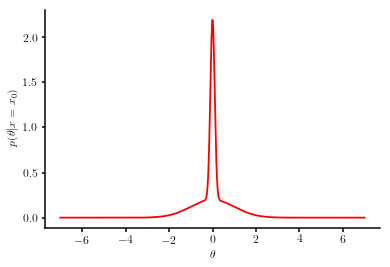

In [28]:
x = np.atleast_2d(np.linspace(-7., 7., 1000)).T
plt.plot(x, true_posterior.eval(x, log=False), '-r')
plt.gca().set_xlabel(r'$\theta$')
plt.gca().set_ylabel(r'$p(\theta|x=x_0)$')
plt.show()

## ... what about the approximate posterior

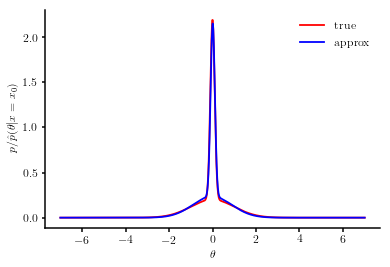

In [29]:
sim = io.load(dirs['dir_nets'] + '/' + prefix + '_' + postfix + '_sim.pkl')
true_posterior = sim.calc_posterior()
approx_posterior = io.load(dirs['dir_nets'] + '/' + prefix + '_' + postfix + '_posterior.pkl')

x = np.atleast_2d(np.linspace(-7., 7., 1000)).T
plt.plot(x, true_posterior.eval(x, log=False), '-r')
plt.plot(x, approx_posterior.eval(x, log=False), '-b')
plt.gca().set_xlabel(r'$\theta$')
plt.gca().set_ylabel(r'$p/\hat{p}(\theta|x=x_0)$')
plt.legend(['true', 'approx'])
plt.show()

## ... at different $x_o$

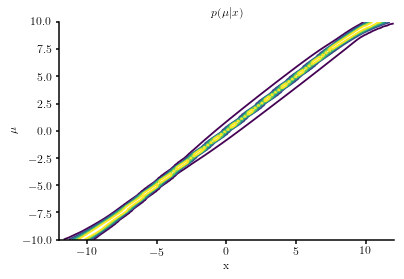

In [30]:
net = io.load(dirs['dir_nets'] + '/' + prefix + '_' + postfix + '_net.pkl')

# grids for plotting
xx = np.linspace(-12.0, 12.0, 100)
yy = np.linspace(-10.0, 10.0, 100)
X, Y = np.meshgrid(xx, yy)
xy = np.stack([X.flatten(), Y.flatten()], axis=1)

# show mdn's conditional probability density
fig, ax = plt.subplots(1, 1, facecolor='white')
Z = np.exp(net.eval([xy[:, 0:1], xy[:, 1:2]])).reshape(list(X.shape))
Z[Z>1]=1.  # clipping
ax.contour(X, Y, Z)
ax.set_xlabel('x')
ax.set_ylabel('$\mu$')
ax.set_title('$p(\mu|x)$')

plt.show()

## evaluating parameters

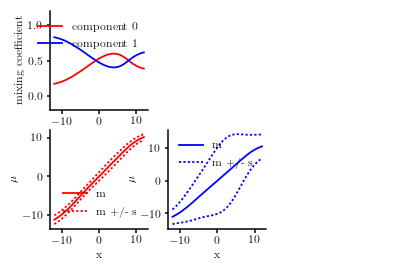

In [31]:
xx = np.linspace(-12.0, 12.0, 100)

# show mdn's parameters
a, m, s = net.eval_comps(xx[:, np.newaxis])

cols = ['r', 'b']
# mixing coefficients
plt.close()
fig, ax = plt.subplots(2, net.n_components+1, facecolor='white')
for i in range(net.n_components):
    ax[0,0].plot(xx, a[:, i], color=cols[i], label='component {0}'.format(i))
ax[0,0].set_ylim([-0.2, 1.2])
ax[0,0].set_xlabel('x')
ax[0,0].set_ylabel('mixing coefficient')
ax[0,0].legend()

ax[0,1].set_axis_off()

# means and stds
for i in range(net.n_components):
    m[i] = np.squeeze(m[i])
    s[i] = np.squeeze(s[i])
    ax[1,i].plot(xx, m[i], '-', color=cols[i], label='m')
    ax[1,i].plot(xx, m[i] + s[i], ':', color=cols[i], label='m +/- s')
    ax[1,i].plot(xx, m[i] - s[i], ':', color=cols[i])
    ax[1,i].set_xlabel('x')
    ax[1,i].set_ylabel('$\mu$')
    ax[1,i].legend()

ax[0,2].set_axis_off()
ax[1,2].set_axis_off()